In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
import pandas as pd
import sympy as sp
import math 
import mpmath as mp
%matplotlib inline

In [6]:
## Setting up the things in a function for the solution 
def cuboidTemperatureDistribution(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*x/L1)
        term3 = mp.sin((2*n+1)*np.pi*y/L2)
        x = mp.sinh(k*z)
        y = mp.sinh(k*L3)
        term4 = x/y
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans
    

In [27]:
## Checking the temperatures at different locations of the cuboid
## For the whole surface where we have specified Temperature 
cuboidTemperatureDistribution(1000,0.3,0.5,0.3,0.5,0.5,0.5,300)

mpf('299.79921917363794')

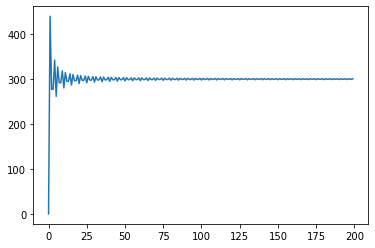

In [9]:
x = np.arange(200)
z = []
for i in x :
    z.append(cuboidTemperatureDistribution(i,0.3,0.5,0.3,0.5,0.5,0.5,300))
plt.plot(x,z)

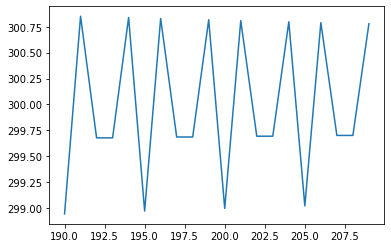

In [11]:
x = np.arange(190,210)
z = []
for i in x :
    z.append(cuboidTemperatureDistribution(i,0.3,0.5,0.3,0.5,0.5,0.5,300))
plt.plot(x,z)

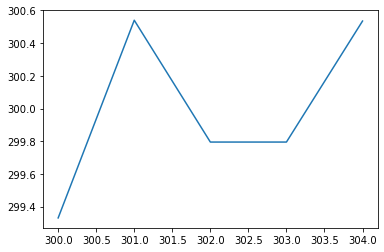

In [12]:
x = np.arange(300,305)
z = []
for i in x :
    z.append(cuboidTemperatureDistribution(i,0.3,0.5,0.3,0.5,0.5,0.5,300))
plt.plot(x,z)

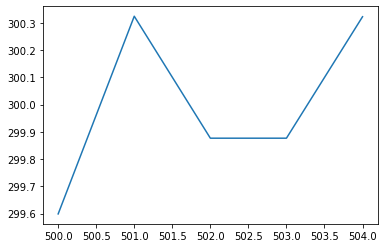

In [14]:
x = np.arange(500,505)
z = []
for i in x :
    z.append(cuboidTemperatureDistribution(i,0.3,0.5,0.3,0.5,0.5,0.5,300))
plt.plot(x,z)

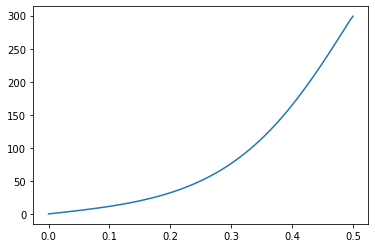

In [29]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
terms = 200
z = np.linspace(0,L3,100)
tempz = []
for i in z :
    tempz.append(cuboidTemperatureDistribution(terms,x,L1,y,L2,i,L3,T))
plt.plot(z,tempz)

In [33]:
## Setting up the things in a function for the solution 
def cuboidTemperatureDistributionZL(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*x/L1)
        term3 = mp.sin((2*n+1)*np.pi*y/L2)
        x1 = mp.sinh(k*z)
        y1 = mp.sinh(k*L3)
        term4 = x1/y1
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans
    

In [34]:
def cuboidTemperatureDistributionXL(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*z/L3)
        term3 = mp.sin((2*n+1)*np.pi*y/L2)
        x1 = mp.sinh(k*x)
        y1 = mp.sinh(k*L1)
        term4 = x1/y1
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans

In [35]:
## Setting up the things in a function for the solution 
def cuboidTemperatureDistributionYL(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*x/L1)
        term3 = mp.sin((2*n+1)*np.pi*z/L3)
        x1 = mp.sinh(k*y)
        y1 = mp.sinh(k*L2)
        term4 = x1/y1
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans
    

In [37]:
def netTempCuboid(terms,x,L1,y,L2,z,L3,Tlz,Tlx,Tly):
    return cuboidTemperatureDistributionZL(terms,x,L1,y,L2,z,L3,Tlz)+cuboidTemperatureDistributionXL(terms,x,L1,y,L2,z,L3,Tlx)+cuboidTemperatureDistributionYL(terms,x,L1,y,L2,z,L3,Tly)

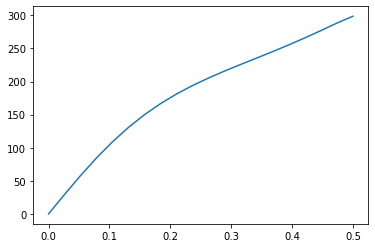

In [39]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
Tlz = 300 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Tlx = 400 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tly = 500 # Temperature at the Y = L2 Plane i.e The Boundary Condition
terms = 150
z = np.linspace(0,L3,20)
tempz = []
for i in z :
    tempz.append(netTempCuboid(terms,x,L1,y,L2,i,L3,Tlz,Tlx,Tly))
plt.plot(z,tempz)

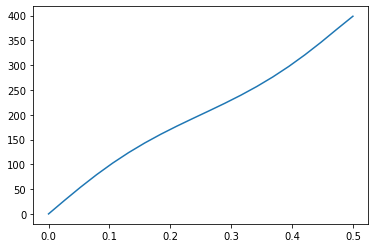

In [42]:

L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
z = 0.25 # Poition in z 
L3 = 0.5 # Max z for the cuboid 
Tlz = 300 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Tlx = 400 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tly = 500 # Temperature at the Y = L2 Plane i.e The Boundary Condition
terms = 200
x = np.linspace(0,L1,20)
tempx = []
for i in x :
    tempx.append(netTempCuboid(terms,i,L1,y,L2,z,L3,Tlz,Tlx,Tly))
plt.plot(x,tempx)

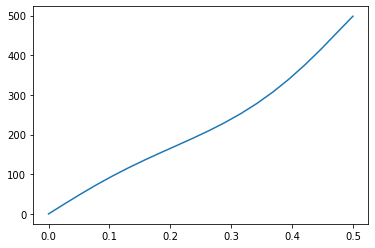

In [43]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
L2 = 0.5 # Max y for the cuboid 
z = 0.25 # Poition in z 
L3 = 0.5 # Max z for the cuboid 
Tlz = 300 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Tlx = 400 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tly = 500 # Temperature at the Y = L2 Plane i.e The Boundary Condition
terms = 200
y = np.linspace(0,L2,20)
tempy = []
for i in y :
    tempy.append(netTempCuboid(terms,x,L1,i,L2,z,L3,Tlz,Tlx,Tly))
plt.plot(y,tempy)

In [44]:
## Setting up the things in a function for the solution 
def cuboidTemperatureDistributionZ0(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*x/L1)
        term3 = mp.sin((2*n+1)*np.pi*y/L2)
        x1 = mp.sinh(k*(L3-z))
        y1 = mp.sinh(k*L3)
        term4 = x1/y1
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans
    

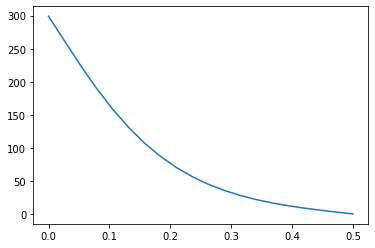

In [46]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
terms = 200
z = np.linspace(0,L3,20)
tempz = []
for i in z :
    tempz.append(cuboidTemperatureDistributionZ0(terms,x,L1,y,L2,i,L3,T))
plt.plot(z,tempz)

In [47]:
## Setting up the things in a function for the solution 
def cuboidTemperatureDistributionX0(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*z/L3)
        term3 = mp.sin((2*n+1)*np.pi*y/L2)
        x1 = mp.sinh(k*(L1-x))
        y1 = mp.sinh(k*L1)
        term4 = x1/y1
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans

In [48]:
## Setting up the things in a function for the solution 
def cuboidTemperatureDistributionY0(terms,x,L1,y,L2,z,L3,T):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        k = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = ((16*T)/((2*n+1)*(2*m+1)*np.pi**2))
        term2 = mp.sin((2*m+1)*np.pi*z/L3)
        term3 = mp.sin((2*n+1)*np.pi*x/L1)
        x1 = mp.sinh(k*(L2-y))
        y1 = mp.sinh(k*L2)
        term4 = x1/y1
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans

In [50]:
def cuboidTemperatureDistribution(terms,x,L1,y,L2,z,L3,Tx0,Ty0,Tz0,Txl,Tyl,Tzl):
    t1 = cuboidTemperatureDistributionX0(terms,x,L1,y,L2,z,L3,Tx0)
    t2 = cuboidTemperatureDistributionY0(terms,x,L1,y,L2,z,L3,Ty0)
    t3 = cuboidTemperatureDistributionZ0(terms,x,L1,y,L2,z,L3,Tz0)
    t4 = cuboidTemperatureDistributionXL(terms,x,L1,y,L2,z,L3,Txl)
    t5 = cuboidTemperatureDistributionYL(terms,x,L1,y,L2,z,L3,Tyl)
    t6 = cuboidTemperatureDistributionZL(terms,x,L1,y,L2,z,L3,Tzl)
    return t1 + t2 + t3 + t4 + t5 + t6 

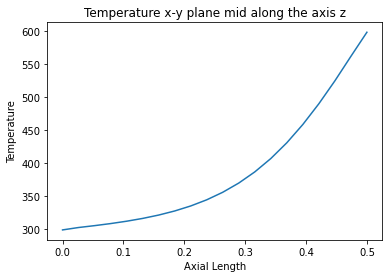

In [55]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
Tx0 = 100 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Ty0 = 200 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tz0 = 300 # Temperature at the Y = L2 Plane i.e The Boundary Condition
Txl = 400 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Tyl = 500 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tzl = 600 # Temperature at the Y = L2 Plane i.e The Boundary Condition
terms = 200
z = np.linspace(0,L3,20)
tempz = []
for i in z :
    tempz.append(cuboidTemperatureDistribution(terms,x,L1,y,L2,i,L3,Tx0,Ty0,Tz0,Txl,Tyl,Tzl))
plt.plot(z,tempz)
plt.title("Temperature x-y plane mid along the axis z")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

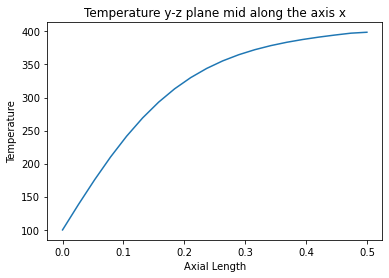

In [56]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
z = 0.25 # posotion in z 
L3 = 0.5 # Max z for the cuboid 
Tx0 = 100 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Ty0 = 200 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tz0 = 300 # Temperature at the Y = L2 Plane i.e The Boundary Condition
Txl = 400 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Tyl = 500 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tzl = 600 # Temperature at the Y = L2 Plane i.e The Boundary Condition
terms = 200
x = np.linspace(0,L1,20)
tempx = []
for i in x :
    tempx.append(cuboidTemperatureDistribution(terms,i,L1,y,L2,z,L3,Tx0,Ty0,Tz0,Txl,Tyl,Tzl))
plt.plot(x,tempx)
plt.title("Temperature y-z plane mid along the axis x")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

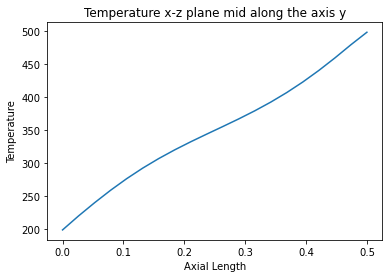

In [57]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
z = 0.25 # posotion in z 
L3 = 0.5 # Max z for the cuboid 
Tx0 = 100 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Ty0 = 200 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tz0 = 300 # Temperature at the Y = L2 Plane i.e The Boundary Condition
Txl = 400 # Temperature at the Z = L3 Plane i.e The Boundary Condition
Tyl = 500 # Temperature at the X = L1 Plane i.e The Boundary Condition
Tzl = 600 # Temperature at the Y = L2 Plane i.e The Boundary Condition
terms = 200
y = np.linspace(0,L1,20)
tempy = []
for i in y :
    tempy.append(cuboidTemperatureDistribution(terms,x,L1,i,L2,z,L3,Tx0,Ty0,Tz0,Txl,Tyl,Tzl))
plt.plot(y,tempy)
plt.title("Temperature x-z plane mid along the axis y")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

In [65]:
df = pd.read_excel("cuboid.xlsx")

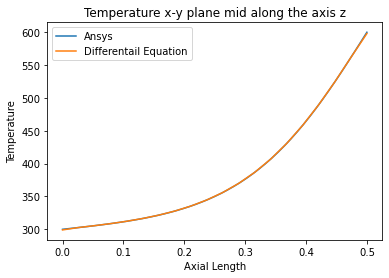

In [66]:
plt.plot(df.Z,df["TZ"])
z = np.linspace(0,L3,20)
plt.plot(z,tempz)
plt.title("Temperature x-y plane mid along the axis z")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.legend(["Ansys","Differentail Equation"])
plt.show()